In [2]:
import pandas as pd
from transformers import pipeline

In [3]:
from google.colab import files
uploaded = files.upload()

file_name = list(uploaded.keys())[0]

Saving IGCommentsExport_DIbUnaEtB-p_100_comments-F-15.csv.csv to IGCommentsExport_DIbUnaEtB-p_100_comments-F-15.csv.csv


In [4]:
df = pd.read_csv(file_name)


print("Kolom yang tersedia:", df.columns.tolist())

Kolom yang tersedia: ['User Id', 'Username', 'Comment Id', 'Comment Text', 'Profile URL', 'Avatar URL', 'Date']


In [5]:
print(df.head())

       User Id       Username         Comment Id  \
0  59569983511    jorg_leocat  18093794800568204   
1  59569983511    jorg_leocat  18498687289060980   
2  59569983511    jorg_leocat  18101351359518082   
3  50482479904    anggoro9468  17973747944707514   
4  68836876656  mnaufal_arief  17987233547807554   

                                        Comment Text  \
0  Boro boro. Rusia yang negara produsen aja ga m...   
1          @pungky_hartono emang udah battle proven💀   
2  SU-57 boro boro. Rusia yang nota Bene negara p...   
3  @jorg_leocat di apotek Om. Itu ada obat Kurapn...   
4  @samsularifin5320 fun fact, F-16 Viper Block 7...   

                               Profile URL  \
0    https://www.instagram.com/jorg_leocat   
1    https://www.instagram.com/jorg_leocat   
2    https://www.instagram.com/jorg_leocat   
3    https://www.instagram.com/anggoro9468   
4  https://www.instagram.com/mnaufal_arief   

                                          Avatar URL                   Da

In [6]:
kolom_komentar = "Comment Text"

In [7]:
sentiment_analyzer = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


In [8]:
df["sentiment"] = df[kolom_komentar].astype(str).apply(lambda x: sentiment_analyzer(x)[0]["label"])
df["score"] = df[kolom_komentar].astype(str).apply(lambda x: sentiment_analyzer(x)[0]["score"])

In [9]:
print(df[[kolom_komentar, "sentiment", "score"]].head())

                                        Comment Text sentiment     score
0  Boro boro. Rusia yang negara produsen aja ga m...  NEGATIVE  0.975084
1          @pungky_hartono emang udah battle proven💀  NEGATIVE  0.988180
2  SU-57 boro boro. Rusia yang nota Bene negara p...  NEGATIVE  0.991288
3  @jorg_leocat di apotek Om. Itu ada obat Kurapn...  NEGATIVE  0.997566
4  @samsularifin5320 fun fact, F-16 Viper Block 7...  NEGATIVE  0.986094


In [12]:
import matplotlib.pyplot as plt

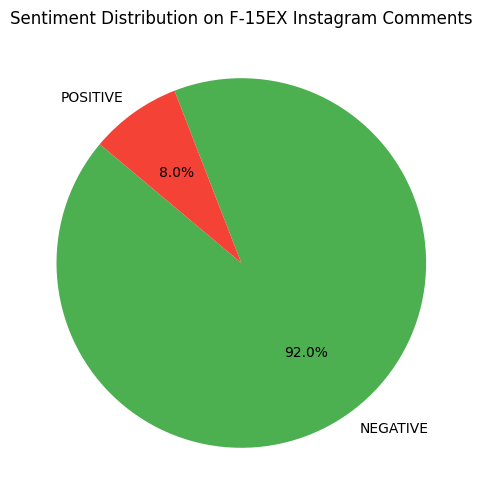

In [13]:
sentiment_counts = df["sentiment"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=["#4CAF50","#F44336","#FFC107"])
plt.title("Sentiment Distribution on F-15EX Instagram Comments")
plt.show()


In [14]:
output_file = "hasil_sentimen.csv"
df.to_csv(output_file, index=False)

print("Analisis selesai! File hasil disimpan dengan nama:", output_file)


Analisis selesai! File hasil disimpan dengan nama: hasil_sentimen.csv
